this notebook title is : **Apple damage detection**

*created by Bartosz Ogórek*


check if you are connected to gpu

metod 1

In [ ]:
!nvidia-smi

Fri Jun 21 19:55:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

metod 2

In [ ]:
import torch

if torch.cuda.is_available():
  print(f"GPU Name: {torch.cuda.get_device_name(0)}")
  print(f"GPU Is Available: {torch.cuda.is_available()}")
else:
  print("GPU is not available")

GPU Name: Tesla T4
GPU Is Available: True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
%mkdir /mydrive/yolov9

mkdir: cannot create directory ‘/mydrive/yolov9’: No such file or directory


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


connect your google drive to upload files

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 25.15 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.1 MB/s eta 0:00:00


In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Jun 21 20:02 .
drwxr-xr-x 1 root root      4096 Jun 21 20:02 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:
!wget -P {HOME}/data -q https://upload.wikimedia.org/wikipedia/commons/1/15/Red_Apple.jpg

Upload your data

In [ ]:
SOURCE_IMAGE_PATH = f"{HOME}/data/Red_Apple.jpg"

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/Red_Apple.jpg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/Red_Apple.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/data/Red_Apple.jpg: 608x640 1 apple, 96.7ms
Speed: 0.6ms pre-process, 96.7ms inference, 699.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


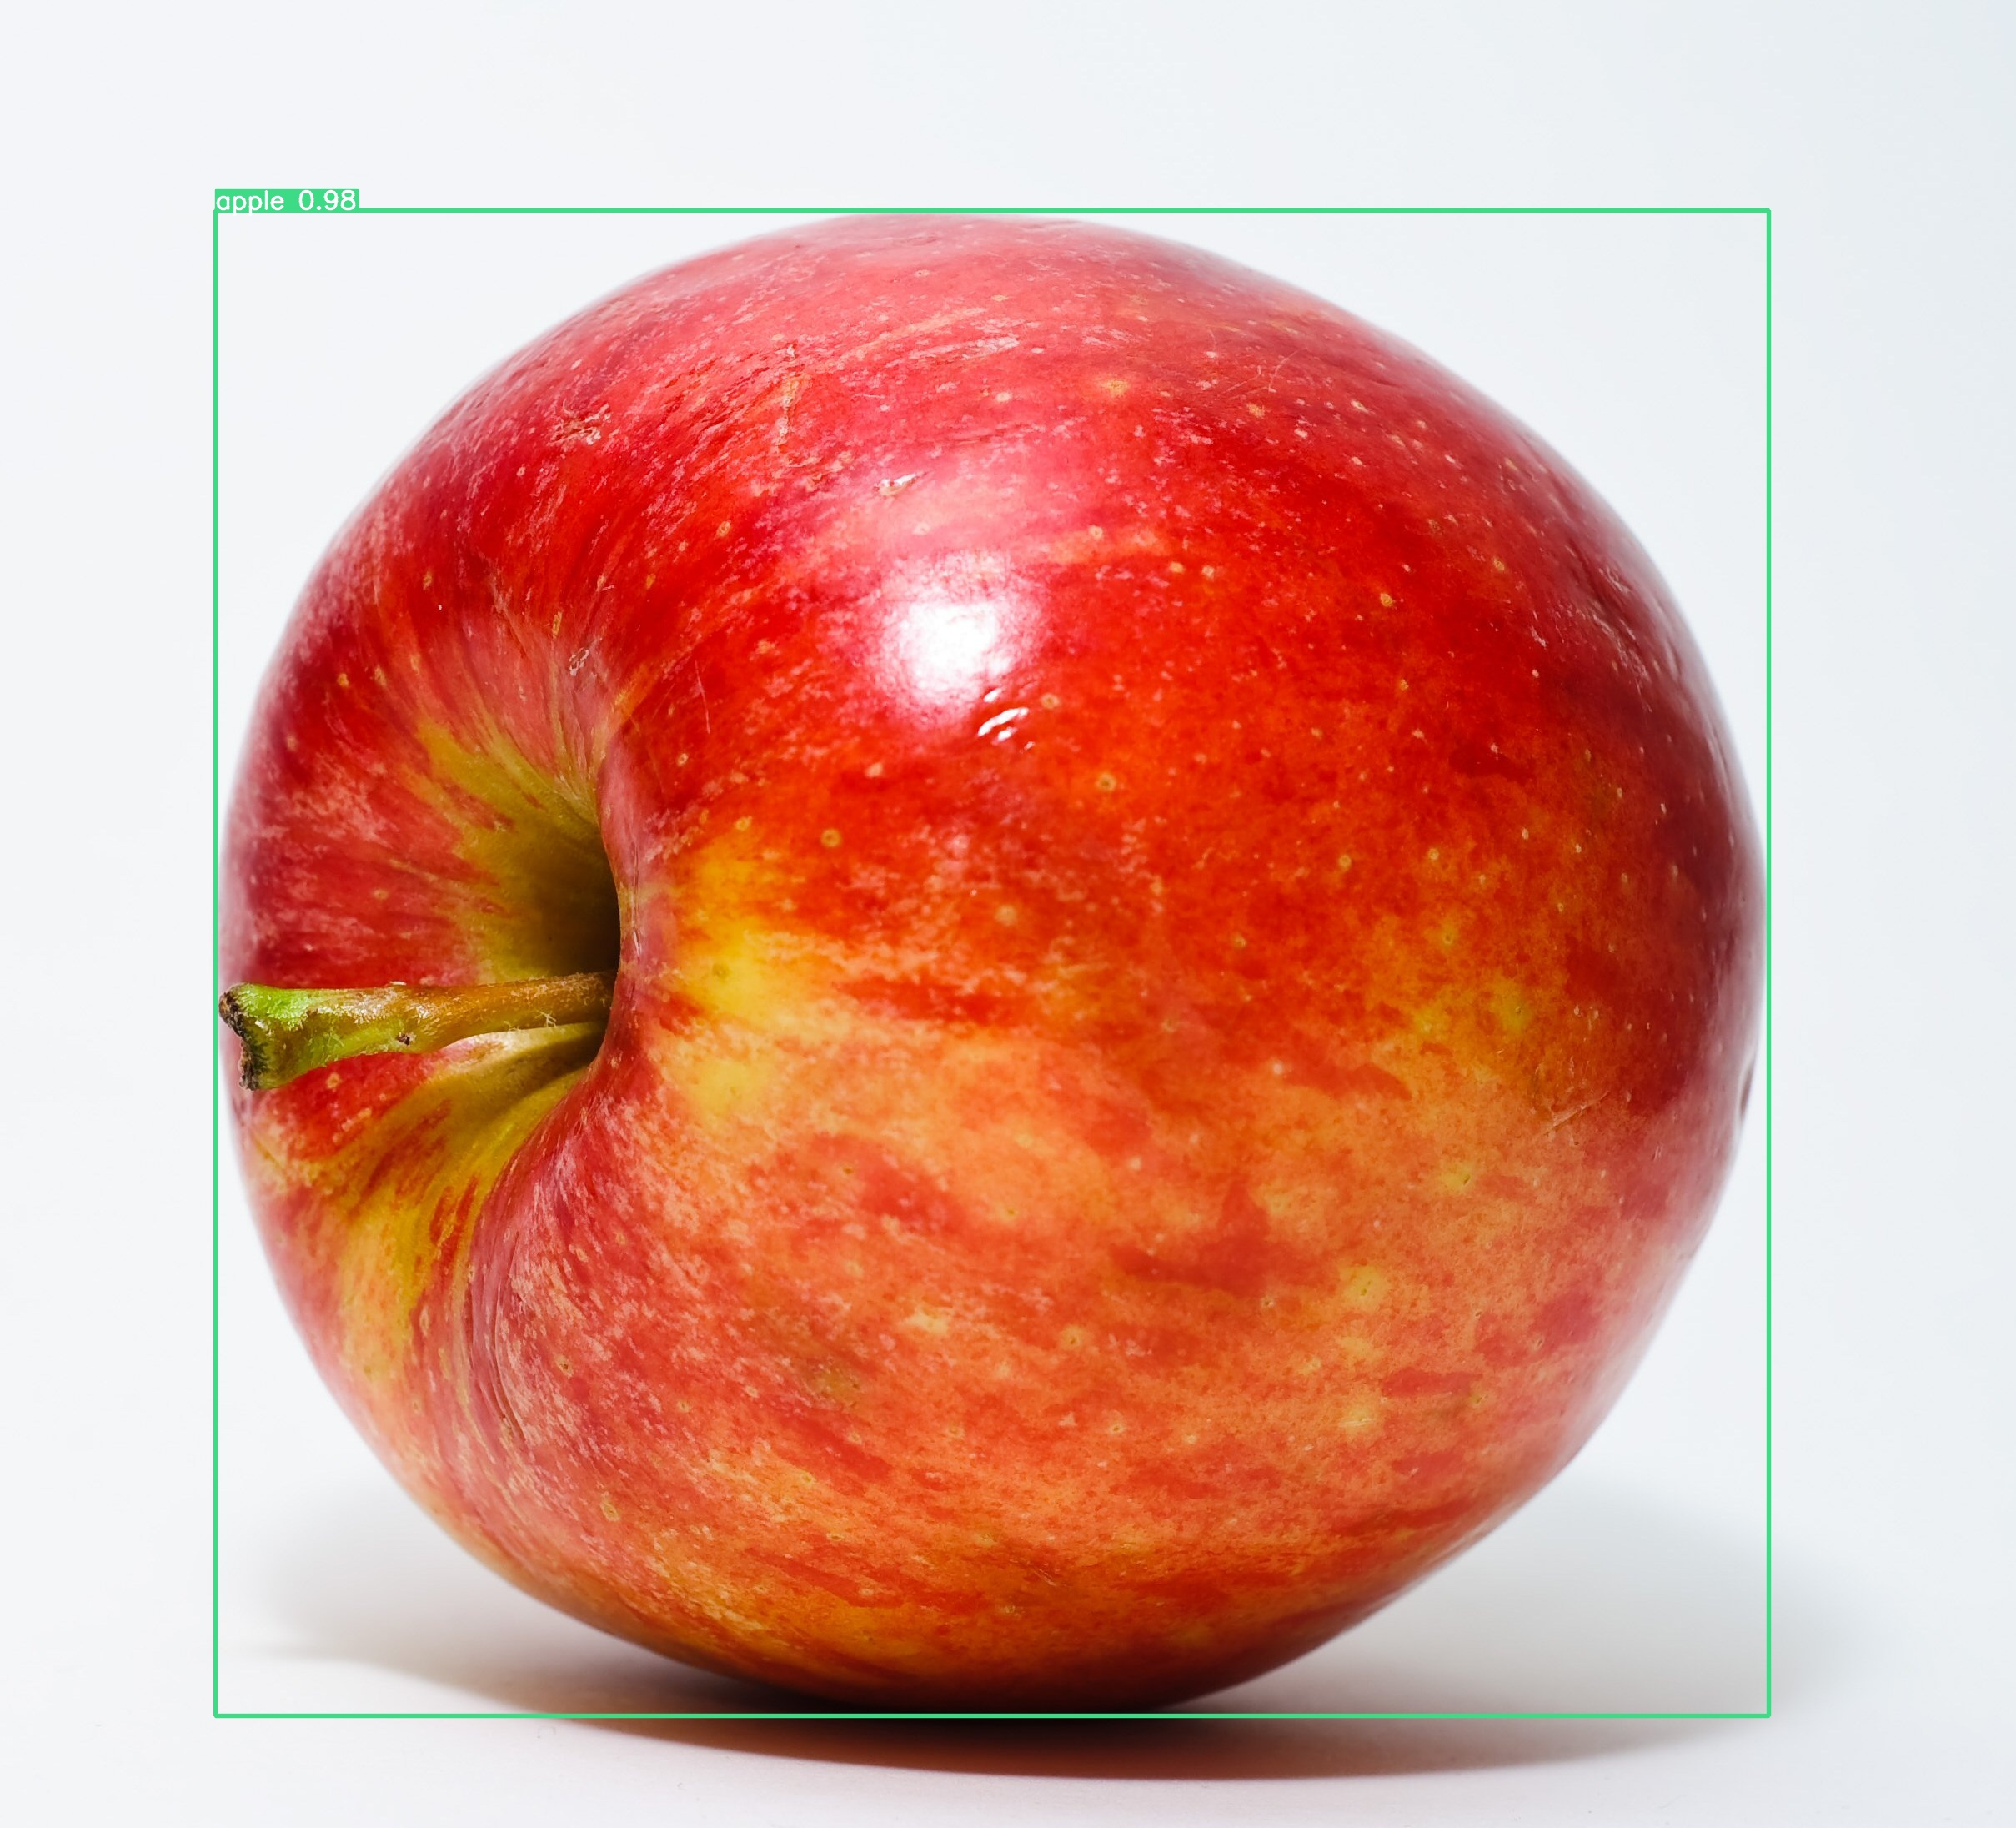

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/Red_Apple.jpg", width=600)

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/Red_Apple.jpg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/Red_Apple.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/data/Red_Apple.jpg: 608x640 1 apple, 141.0ms
Speed: 0.6ms pre-process, 141.0ms inference, 602.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


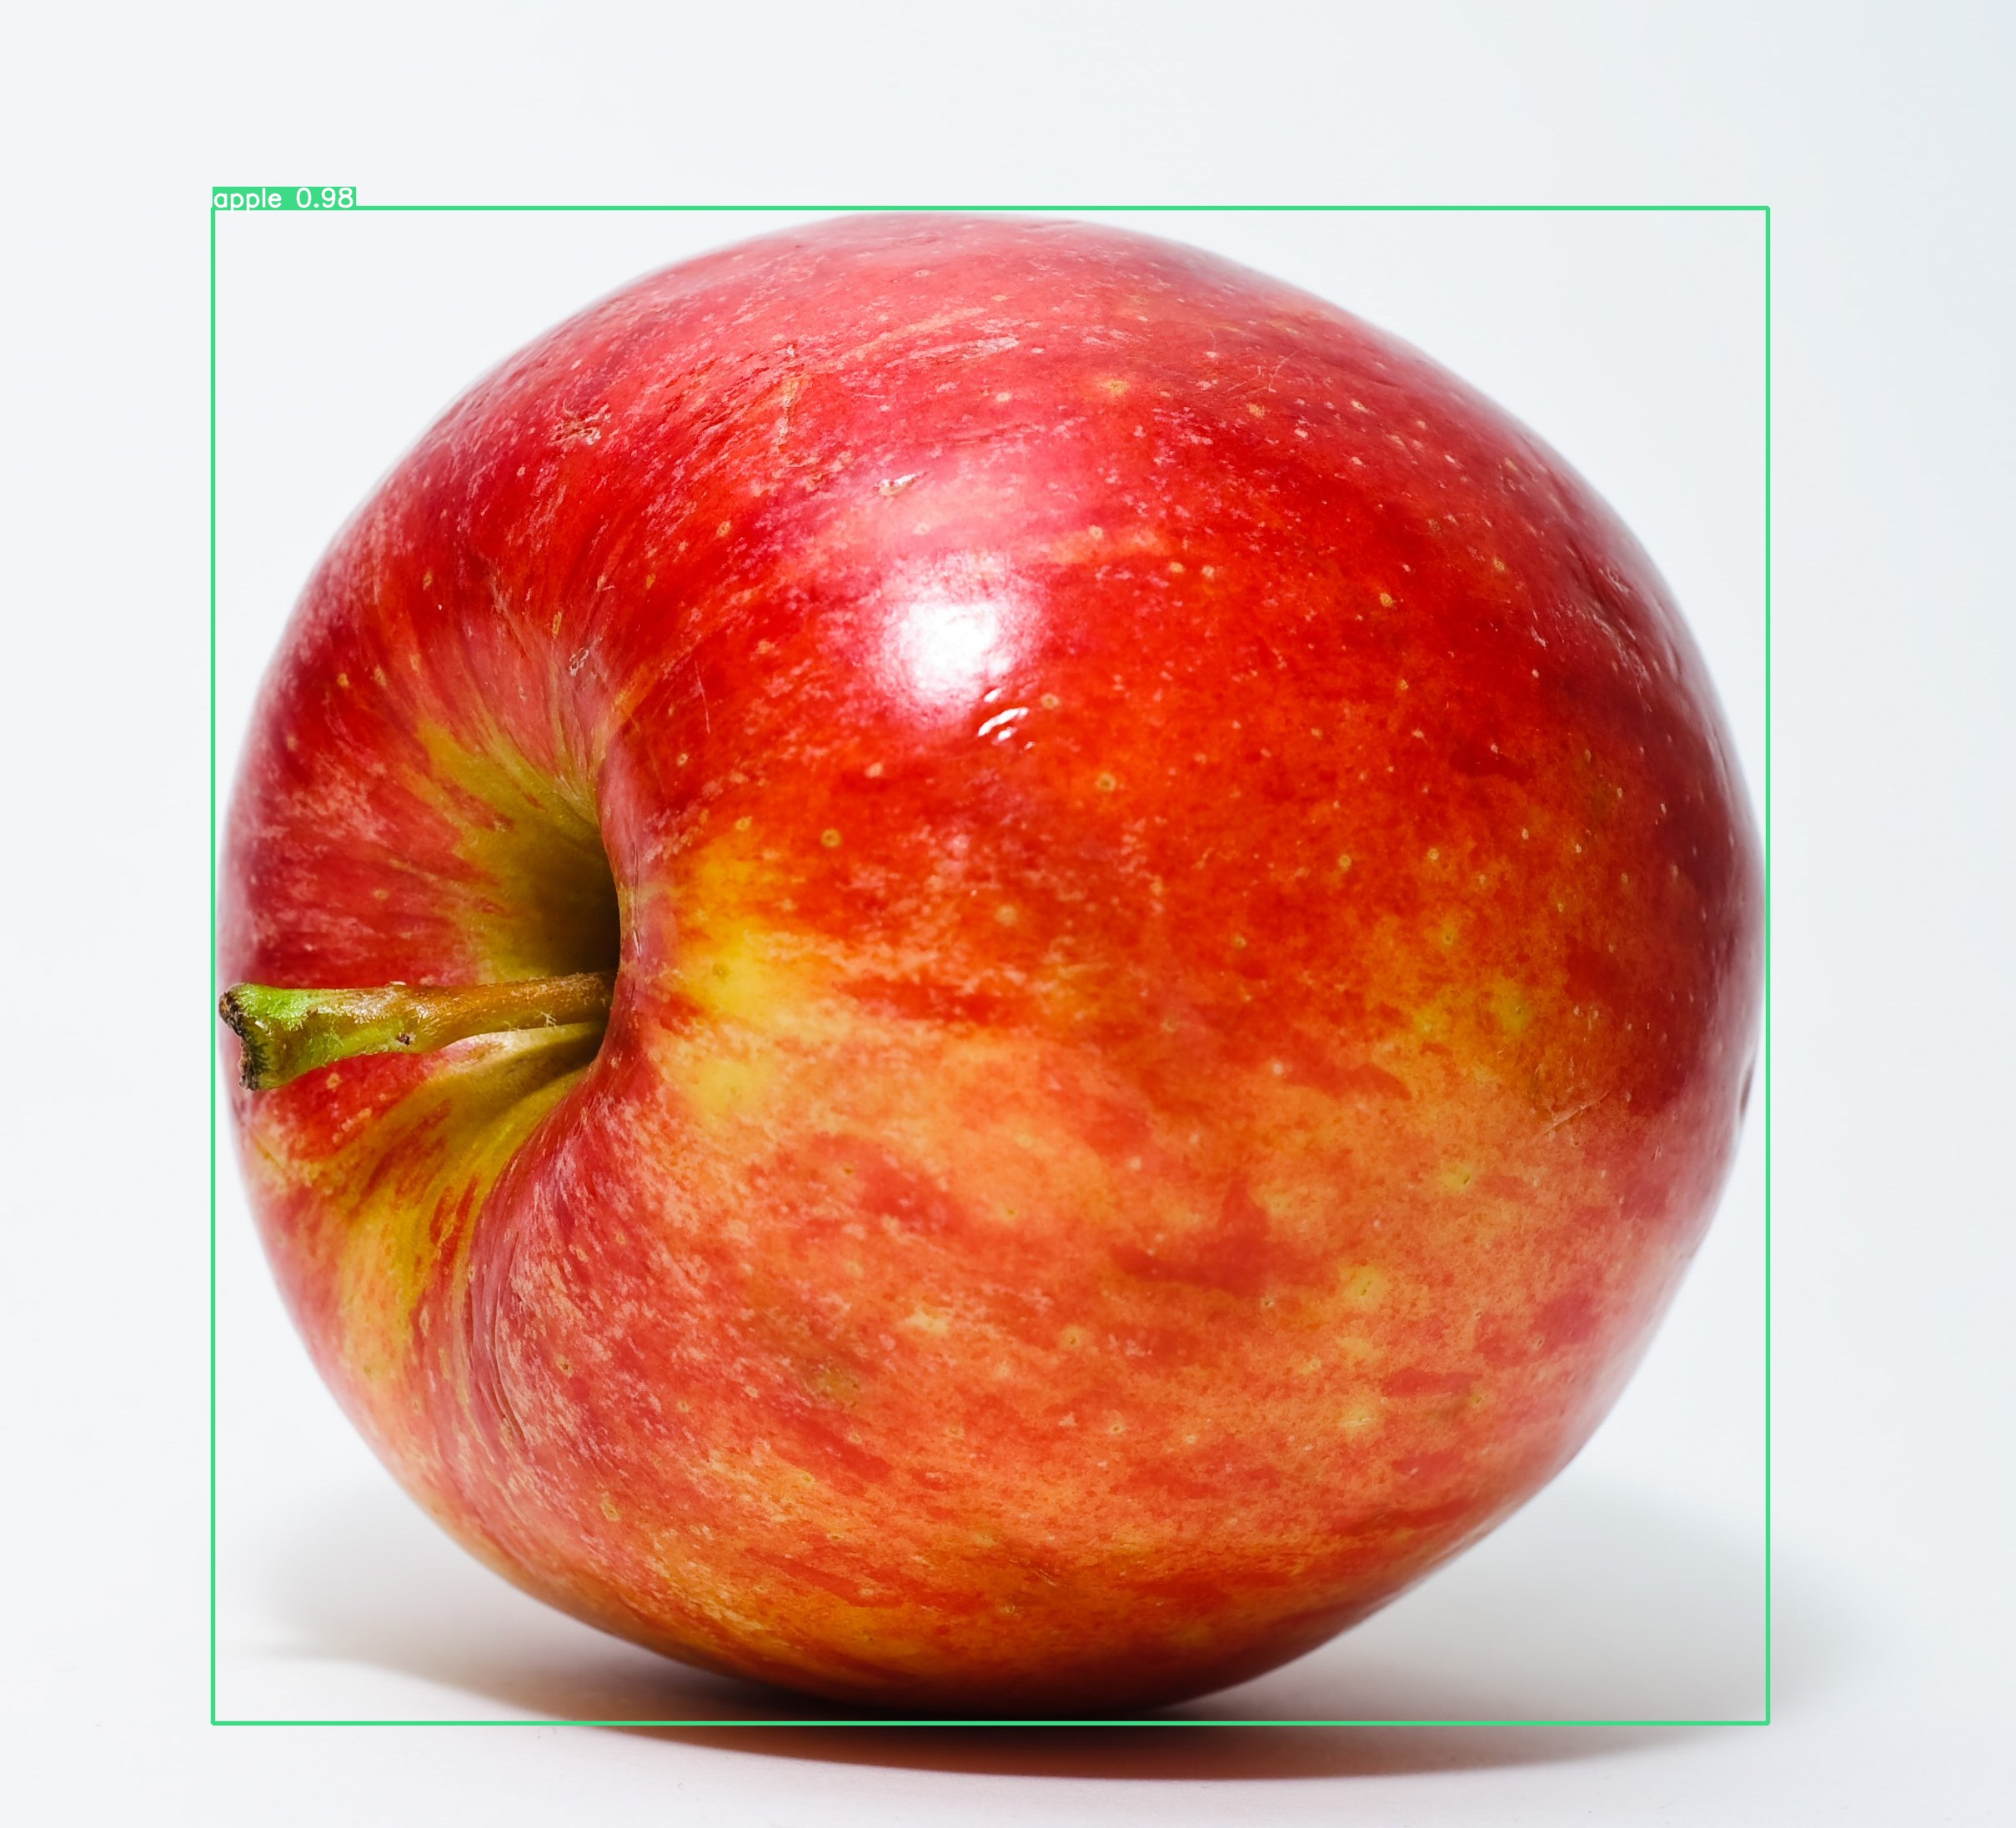

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp2/Red_Apple.jpg", width=600)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ILzRPM8bjIq6BFODGyoQ")
project = rf.workspace("student-1iigu").project("appledetection-ro9uk")
version = project.version(1)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to appledetection-1 in yolov9:: 100%|██████████| 400/400 [00:00<00:00, 5246.45it/s]


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 7.2 MB/s eta 0:00:00


In [ ]:
print(dataset.location)

/content/yolov9/appledetection-1


In [ ]:
!yolo train model=yolov9c.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

100% 49.4M/49.4M [00:00<00:00, 320MB/s]
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/yolov9/appledetection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

In [ ]:
%ls


appledetection-1/  export.py   __pycache__/      segment/         val_dual.py
benchmarks.py      figure/     README.md         train_dual.py    val.py
classify/          hubconf.py  requirements.txt  train.py         val_triple.py
data/              models/     runs/             train_triple.py  yolov8n.pt
detect.py          panoptic/   scripts/          utils/           yolov9c.pt


In [ ]:
!yolo detect val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs
val: Scanning /content/yolov9/appledetection-1/valid/labels.cache... 39 images, 0 backgrounds, 0 corrupt: 100% 39/39 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 82, len(boxes) = 112. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:04<00:00,  1.47s/it]
                   all         39        112      0.705      0.669      0.667      0.602
                 apple         19         31      0.934      0.919      0.952      0.926
                damage         21         44      0.867      0.955      0.969      0.853
        defected_apple         21

In [ ]:
!yolo export model=runs/detect/train/weights/best.pt format=tflite # export custom trained model

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (49.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'sng4onnx>=1.0.1', 'onnxslim==0.1.28', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 211.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 173.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 260.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 244.2 M

In [ ]:
!zip -r /content/file.zip /content/yolov9

  adding: content/yolov9/ (stored 0%)
  adding: content/yolov9/yolov9c.pt (deflated 8%)
  adding: content/yolov9/train_dual.py (deflated 70%)
  adding: content/yolov9/figure/ (stored 0%)
  adding: content/yolov9/figure/performance.png (deflated 2%)
  adding: content/yolov9/val_dual.py (deflated 67%)
  adding: content/yolov9/detect.py (deflated 67%)
  adding: content/yolov9/classify/ (stored 0%)
  adding: content/yolov9/classify/predict.py (deflated 68%)
  adding: content/yolov9/classify/train.py (deflated 66%)
  adding: content/yolov9/classify/val.py (deflated 66%)
  adding: content/yolov9/train.py (deflated 70%)
  adding: content/yolov9/utils/ (stored 0%)
  adding: content/yolov9/utils/loss.py (deflated 77%)
  adding: content/yolov9/utils/triton.py (deflated 68%)
  adding: content/yolov9/utils/autoanchor.py (deflated 60%)
  adding: content/yolov9/utils/__init__.py (deflated 54%)
  adding: content/yolov9/utils/downloads.py (deflated 61%)
  adding: content/yolov9/utils/panoptic/ (stored

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>